In [1]:
# Author: minyaho
# Date: 2021-07-17

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()

X = data['data']
y = data['target']

SC = StandardScaler()
SC.fit(X)
#print("Std:{}, Mean:{}".format(SC.scale_, SC.mean_))
X = SC.transform(X)

# 3種降維度
1. PCA
2. MDS
3. t-SNE

In [5]:
# PCA (Principal Component Analysis)
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
# print(X.shape)
# print(y.shape)

# MDS (Multi-dimensional Scaling)
# mds = MDS(n_components = 2)
# X = mds.fit_transform(X)

# t-SNE
# tsne = TSNE(random_state = 0)
# X = tsne.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

In [6]:
def print_score(model,X_train,y_train,X_test,y_test,image_title=''):
    from sklearn.metrics import precision_recall_curve, f1_score, precision_score, recall_score, roc_curve, auc, accuracy_score
    # print("Train Accuracy: ", model.score(Xp_train, y_train))
    # print("Test Accuracy: ", model.score(Xp_test, y_test))
    print('%s: %.3f' % ('Train Accuracy', accuracy_score(y_train, model.predict(X_train))))
    print('%s: %.3f' % ('Test Accuracy', accuracy_score(y_test, model.predict(X_test))))

    print('%s: %.3f' % ('Train Prescision Score', precision_score(y_train, model.predict(X_train))))
    print('%s: %.3f' % ('Test Prescision Score', precision_score(y_test, model.predict(X_test))))

    print('%s: %.3f' % ('Train Recall Score', recall_score(y_train, model.predict(X_train))))
    print('%s: %.3f' % ('Test Recall Score', recall_score(y_test, model.predict(X_test))))

    print('%s: %.3f' % ('Train F1 Score', f1_score(y_train, model.predict(X_train))))
    print('%s: %.3f' % ('Test F1 Score', f1_score(y_test, model.predict(X_test))))
    
    if(0):#type(model)==type(SVC())):
        fpr, tpr , _ = roc_curve(y_test, model.predict(X_test))
    else:
        fpr, tpr , _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    #print(fpr)
    #print(tpr)
    roc_auc = auc(fpr,tpr)
    print('Area-under-ROC curve: %0.3f'%(roc_auc))
    
    if(0):#type(model)==type(SVC())):
        precision, recall, thresholds = precision_recall_curve(y_test, model.predict(X_test))
    else:
        precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])
    #print(precision)
    #print(recall)
    prc_auc = auc(recall,precision)
    print('Area-under-PR curve of: %0.3f'%(prc_auc))

    plt.figure(dpi=150)
    plt.title('Receiver Operation Character curve')
    plt.plot(fpr,tpr,marker='o',color='orange',label='AUC %0.2f'%roc_auc)
    plt.legend(loc = 'lower right')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.plot([0, 1], [0, 1], 'r--', label='No Skill')
    plt.xlabel('True Positive Rate')
    plt.ylabel('False Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    plt.figure(dpi=150)
    plt.xlabel('Recall Rate')
    plt.ylabel('Precision Rate')
    plt.title('Precision-recall curve, '+image_title)
    plt.plot(recall,precision,marker='o',color='orange',label='AUC %0.2f'%prc_auc)
    no_skill = len(y_test[y_test==1]) / len(y_test)
    # print(no_skill)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.legend(loc='lower right')
    plt.show()

    # from sklearn.metrics import plot_precision_recall_curve
    # disp = plot_precision_recall_curve(model, Xp_test, y_test)
    # disp.ax_.set_title('2-class Precision-Recall curve')

#print_score(model,Xp_train,y_train,Xp_test,y_test)

KNeighborsClassifier model


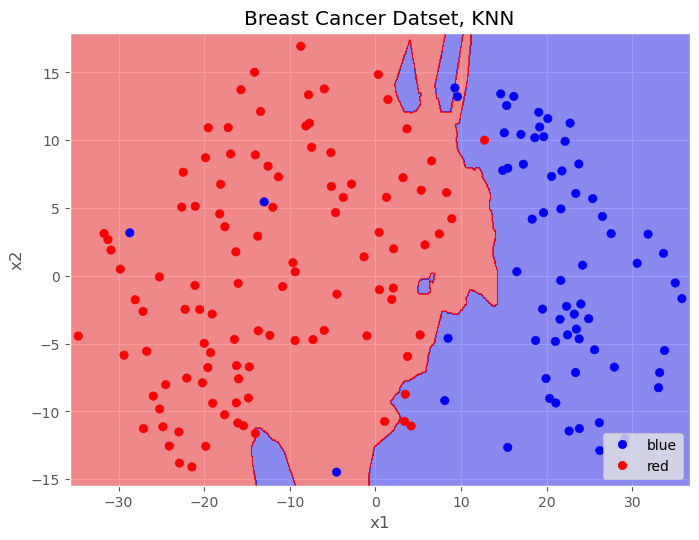

Train Accuracy: 0.970
Test Accuracy: 0.942
Train Prescision Score: 0.969
Test Prescision Score: 0.952
Train Recall Score: 0.984
Test Recall Score: 0.952
Train F1 Score: 0.976
Test F1 Score: 0.952
Area-under-ROC curve: 0.981
Area-under-PR curve of: 0.989


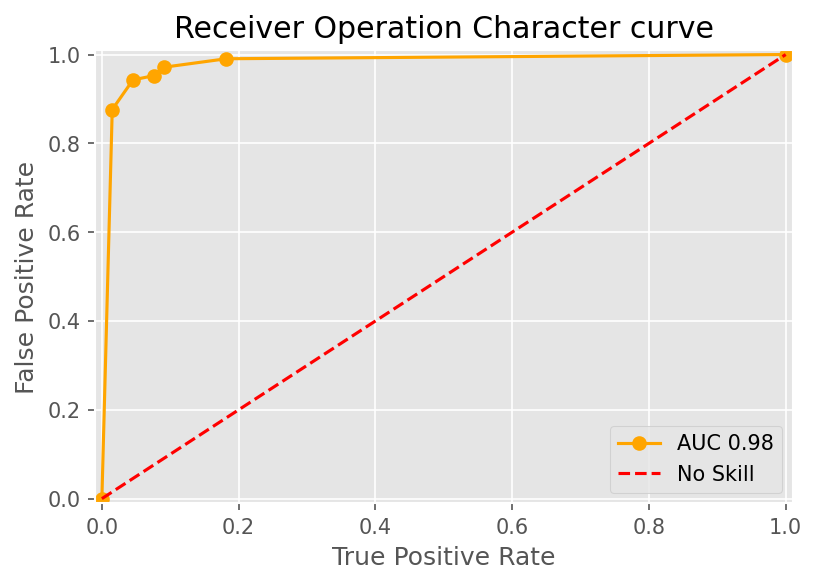

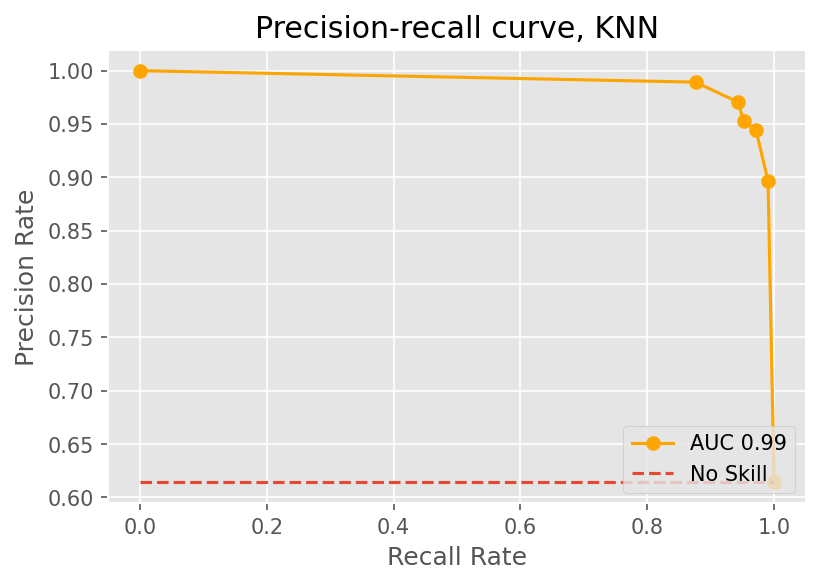

LogisticRegression model


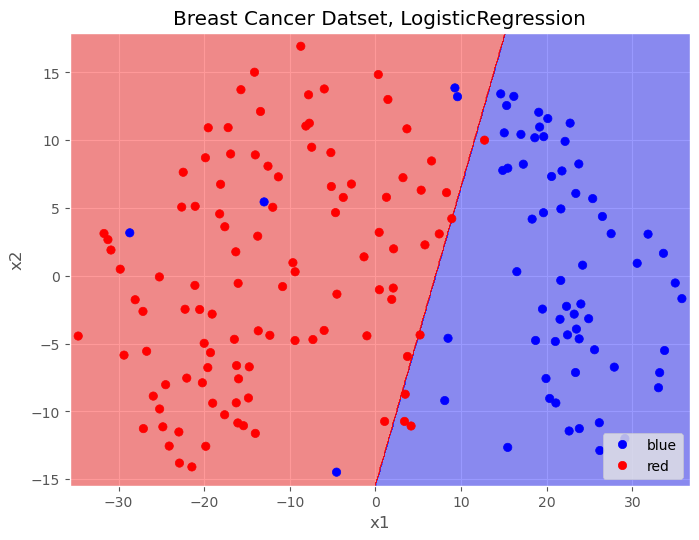

Train Accuracy: 0.945
Test Accuracy: 0.942
Train Prescision Score: 0.960
Test Prescision Score: 0.952
Train Recall Score: 0.952
Test Recall Score: 0.952
Train F1 Score: 0.956
Test F1 Score: 0.952
Area-under-ROC curve: 0.971
Area-under-PR curve of: 0.960


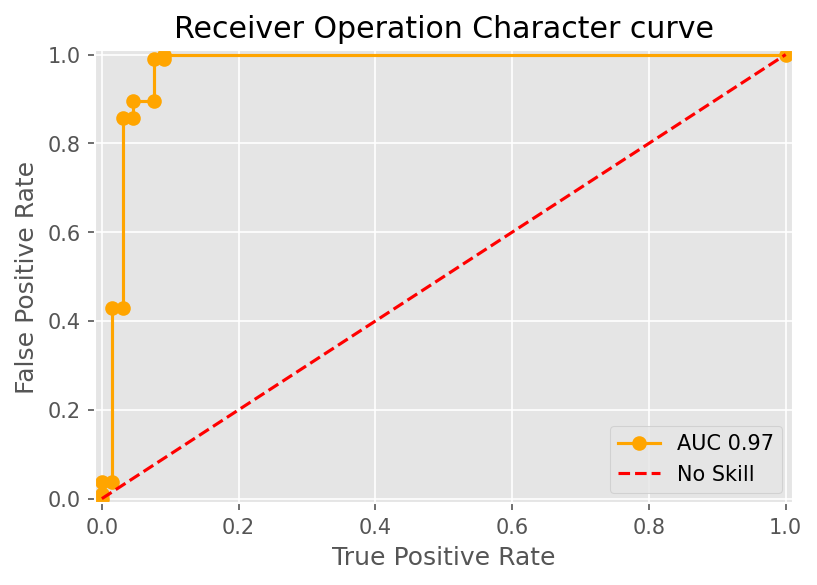

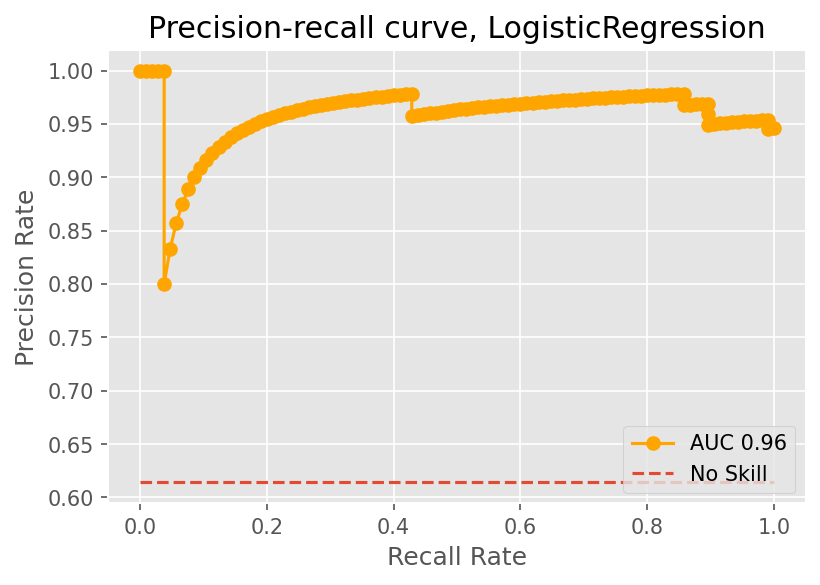

DecisionTreeClassifier model


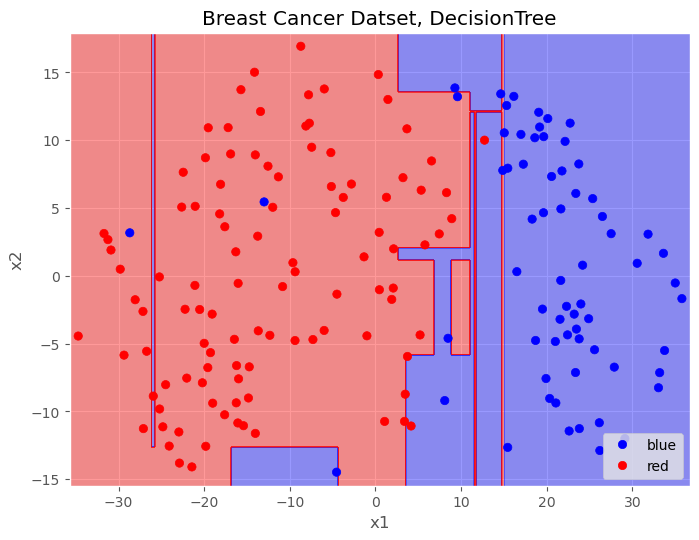

Train Accuracy: 1.000
Test Accuracy: 0.947
Train Prescision Score: 1.000
Test Prescision Score: 0.953
Train Recall Score: 1.000
Test Recall Score: 0.962
Train F1 Score: 1.000
Test F1 Score: 0.957
Area-under-ROC curve: 0.943
Area-under-PR curve of: 0.969


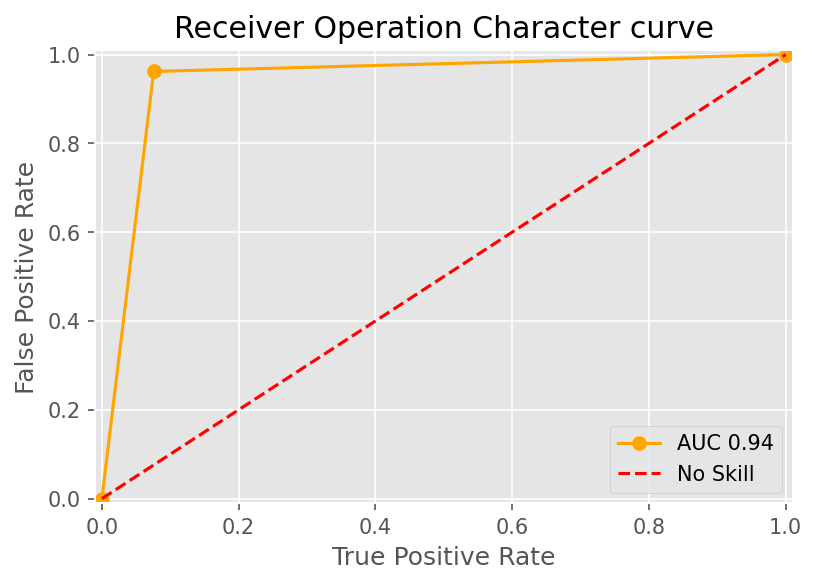

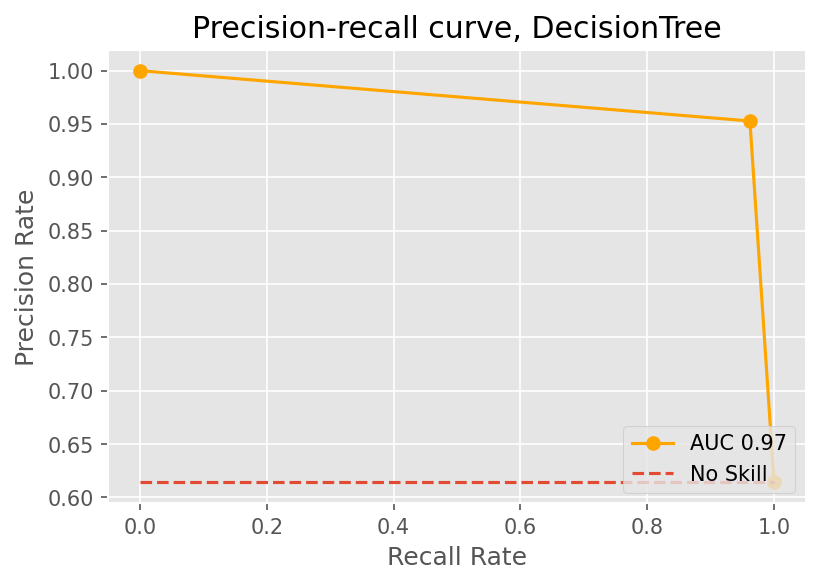

SVC model


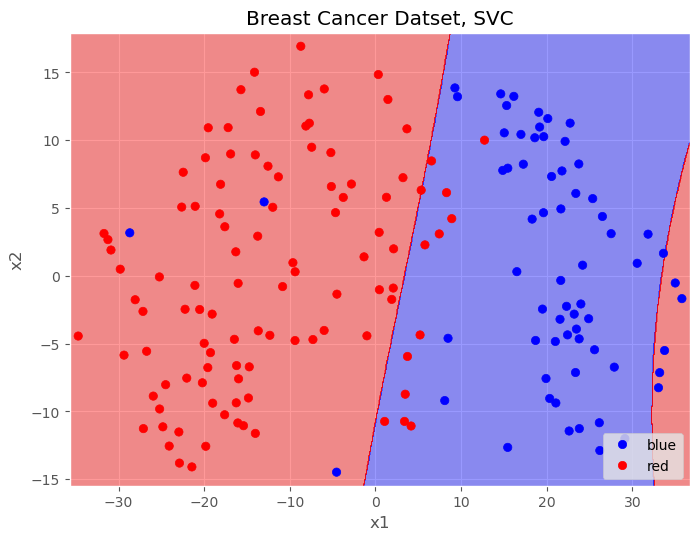

Train Accuracy: 0.897
Test Accuracy: 0.883
Train Prescision Score: 0.927
Test Prescision Score: 0.921
Train Recall Score: 0.909
Test Recall Score: 0.886
Train F1 Score: 0.918
Test F1 Score: 0.903
Area-under-ROC curve: 0.950
Area-under-PR curve of: 0.960


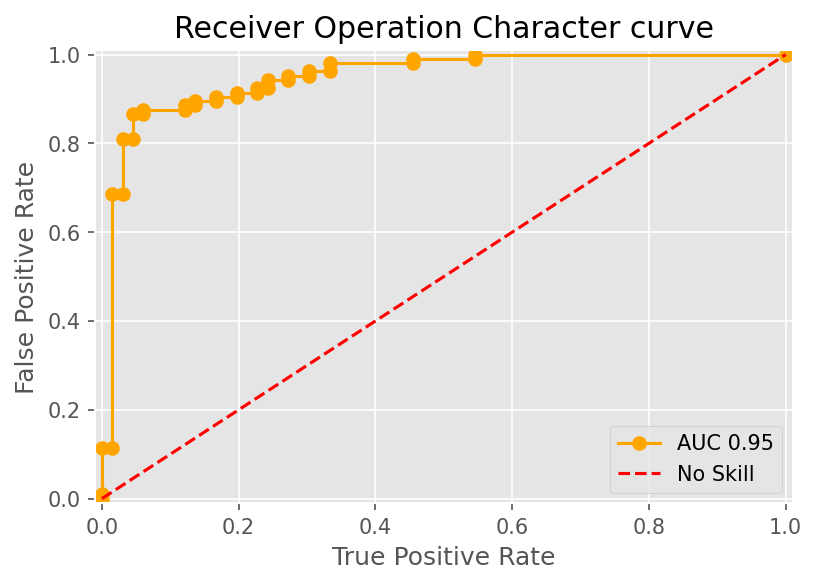

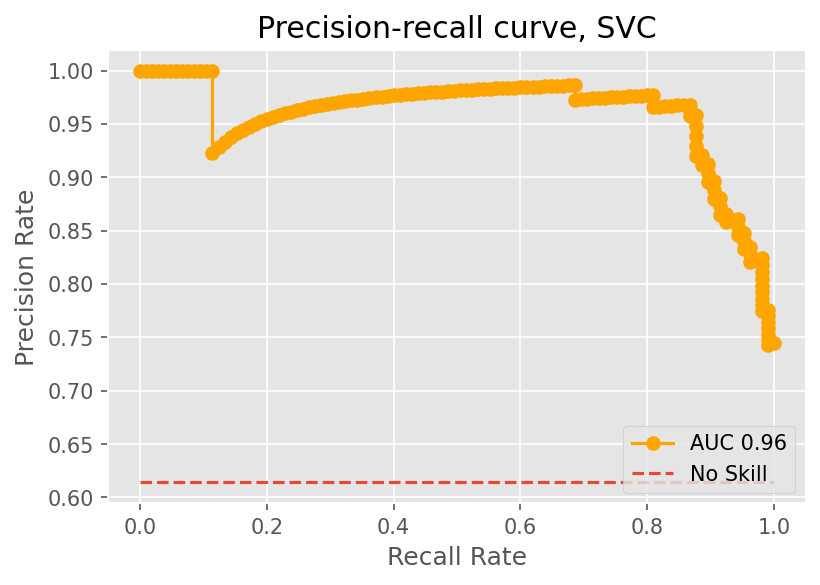

In [7]:
def model_predict(model,X_train,y_train,X_test,y_test,image_title=''):
    x0_min, x0_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    x1_min, x1_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x0_min, x0_max, 0.1), np.arange(x1_min, x1_max, 0.1))
    
    model.fit(X_train, y_train)
    
    style.use('ggplot')
    cmaps = ListedColormap(['blue','red'])
    colors = ListedColormap(['blue','red'])
    fig = plt.figure(figsize=(8,6),dpi=100)
    ax2 = fig.add_subplot(1,1,1)
    ax2.set_xlabel('x1')
    ax2.set_ylabel('x2')
    ax2.set_title('Breast Cancer Datset, '+image_title)
    Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax2.contourf(xx, yy, Z, alpha=0.4, cmap=colors)
    t = ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmaps)
    ax2.legend(handles=t.legend_elements()[0], labels=['blue','red'], loc = 'lower right')
    plt.show()
    
    print_score(model, X_train, y_train, X_test, y_test, image_title)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

print('KNeighborsClassifier model')
model = KNeighborsClassifier(n_neighbors=5)
model_predict(model,X_train,y_train,X_test,y_test,image_title='KNN')

print('LogisticRegression model')
model = LogisticRegression(random_state=0, penalty='l2', C=1.0)
model_predict(model,X_train,y_train,X_test,y_test,image_title='LogisticRegression')

print('DecisionTreeClassifier model')
model = DecisionTreeClassifier(random_state=0, max_depth=None)
model_predict(model,X_train,y_train,X_test,y_test,image_title='DecisionTree')

print('SVC model')
model = SVC(kernel='sigmoid',probability=True ,C=4.0)
model_predict(model,X_train,y_train,X_test,y_test,'SVC')